# Módulo 6 Aula 6

Variáveis contínuas.

Contínuas vs discretas:
- histograma - sns.displot()
- boxplot - sns.boxplot()

Contínua vs contínua:
- Gráfico de dispersão - sns.scatterplot()
- Matriz de dispersão - sns.jointplot() e sns.pairgrid()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [4]:
penguins = sns.load_dataset("penguins")
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
321,Gentoo,Biscoe,55.9,17.0,228.0,5600.0,Male
328,Gentoo,Biscoe,43.3,14.0,208.0,4575.0,Female
121,Adelie,Torgersen,37.7,19.8,198.0,3500.0,Male
83,Adelie,Torgersen,35.1,19.4,193.0,4200.0,Male
100,Adelie,Biscoe,35.0,17.9,192.0,3725.0,Female


### Histogramas

Você pode utilizar os métodos do Pandas, o matplotlib ou o Seaborn. Todos eles trabalham na base do matplotlib, mas o seaborn possui mais recursos para fornecer gráficos mais acabados.

Veja o catálogo do [seaborn](https://seaborn.pydata.org/generated/seaborn.displot.html).

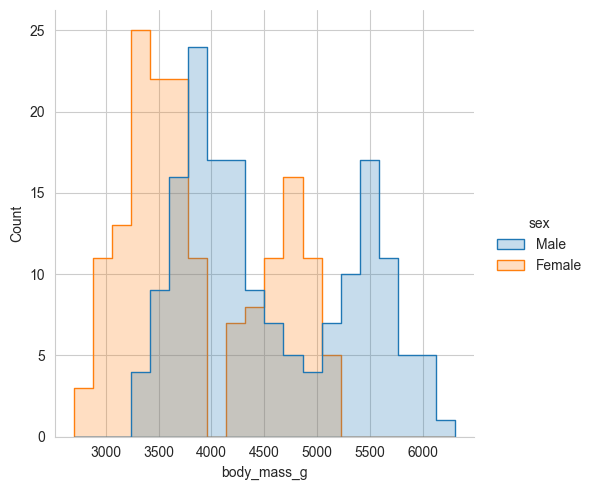

In [5]:
# histograma com covariáveis
sns.displot(data = penguins
            ,x = 'body_mass_g'
            ,hue = 'sex'
            ,bins = 20
            ,element = 'step'
           )

### Boxplot

É possível fazer boxplots através dos métodos do pandas, através do matplotlib, mas o seaborn fornece gráficos mais acabados.

Veja um catálogo dos recursos de boxplot do [seaborn ](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

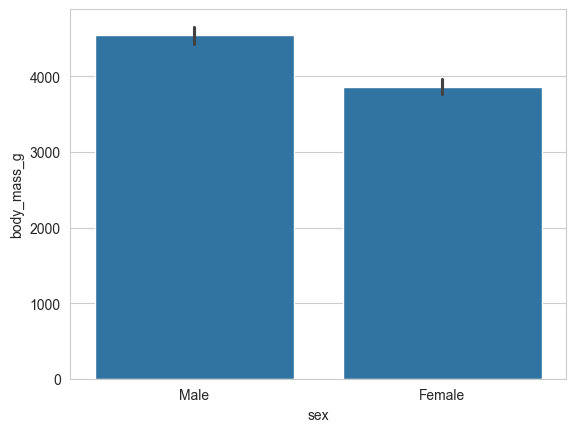

In [13]:
# usando o seaborn
ax = sns.barplot(x="sex", y="body_mass_g", data=penguins)

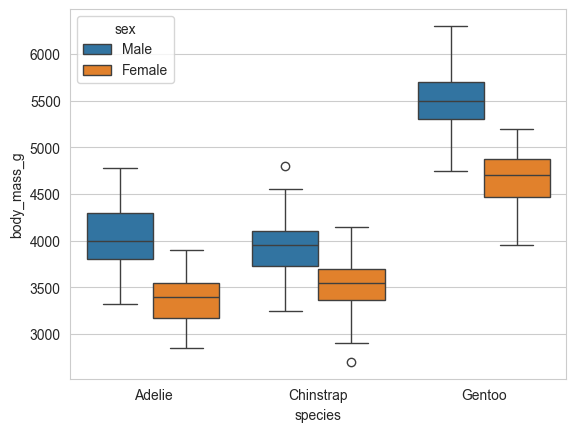

In [7]:
# usando o seaborn
ax = sns.boxplot(data = penguins, y="body_mass_g", x="species", orient="v", hue='sex')

### Scatterplot 
O Seaborn tem diversos recursos para fazer um gráfico de dispersão com uma e diversas variáveis.
- Funçao [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), realiza gráficos de dispersão "simples".
- Função [jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html), tem recursos mais diversificados que fornecem gráficos bem interessantes.
- Função [pairgrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) monta uma matriz de gráficos de dispersão com recursos interessantes para visualização da variabilidade dos dados.

#### Usando transparência

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

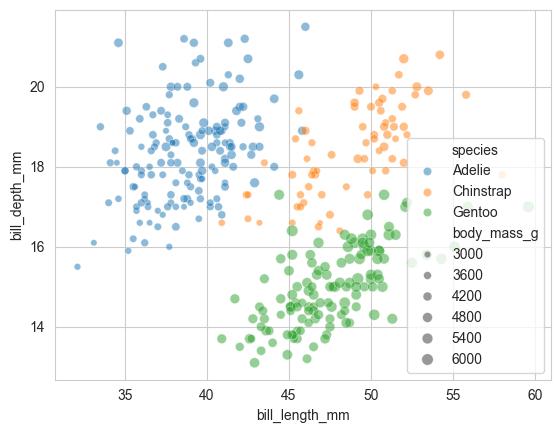

In [8]:
sns.scatterplot(x = 'bill_length_mm'
                , y = 'bill_depth_mm'
                , data = penguins
                , alpha = .5
                , hue = 'species'
                , size = 'body_mass_g'
               )

### Gráficos com muitos pontos
Quando temos muitos pontos, pode se tornar complicado encontrar padrões nesse tipo de gráfico. Algumas ideias são:

- Amostrar os dados
- Utilizar transparência (alpha menor que 1)
- Fazer o 'scatterplot 2D'

#### Histograma 2D

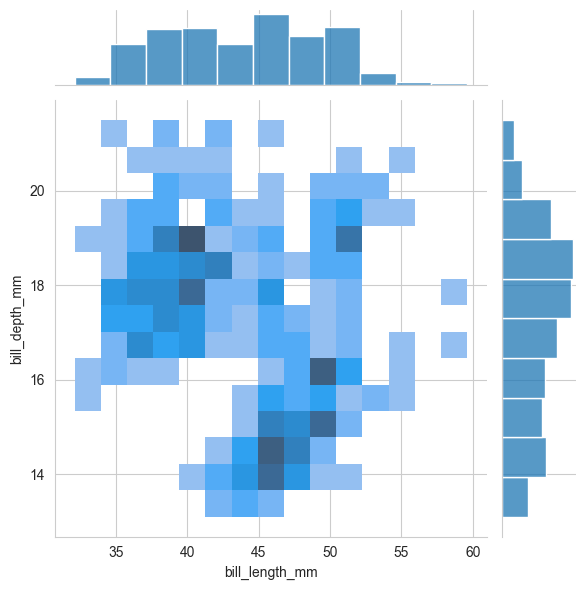

In [9]:
sns.jointplot(x = 'bill_length_mm'
              , y = 'bill_depth_mm'
              , data = penguins
              , kind="hist"
              , bins = [15, 15])

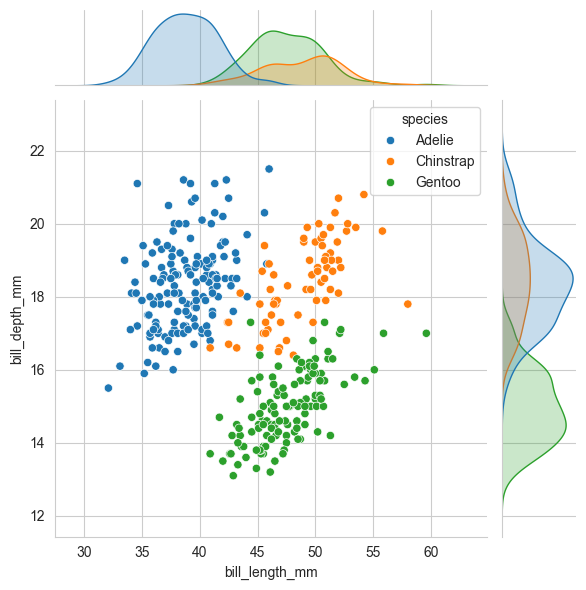

In [10]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue = 'species')

Quando temos muitos pontos o scatterplot dificilmente apresenta uma visualização prática. Para isto há alguns recursos como a transparência e o que se chama de histograma 2d.

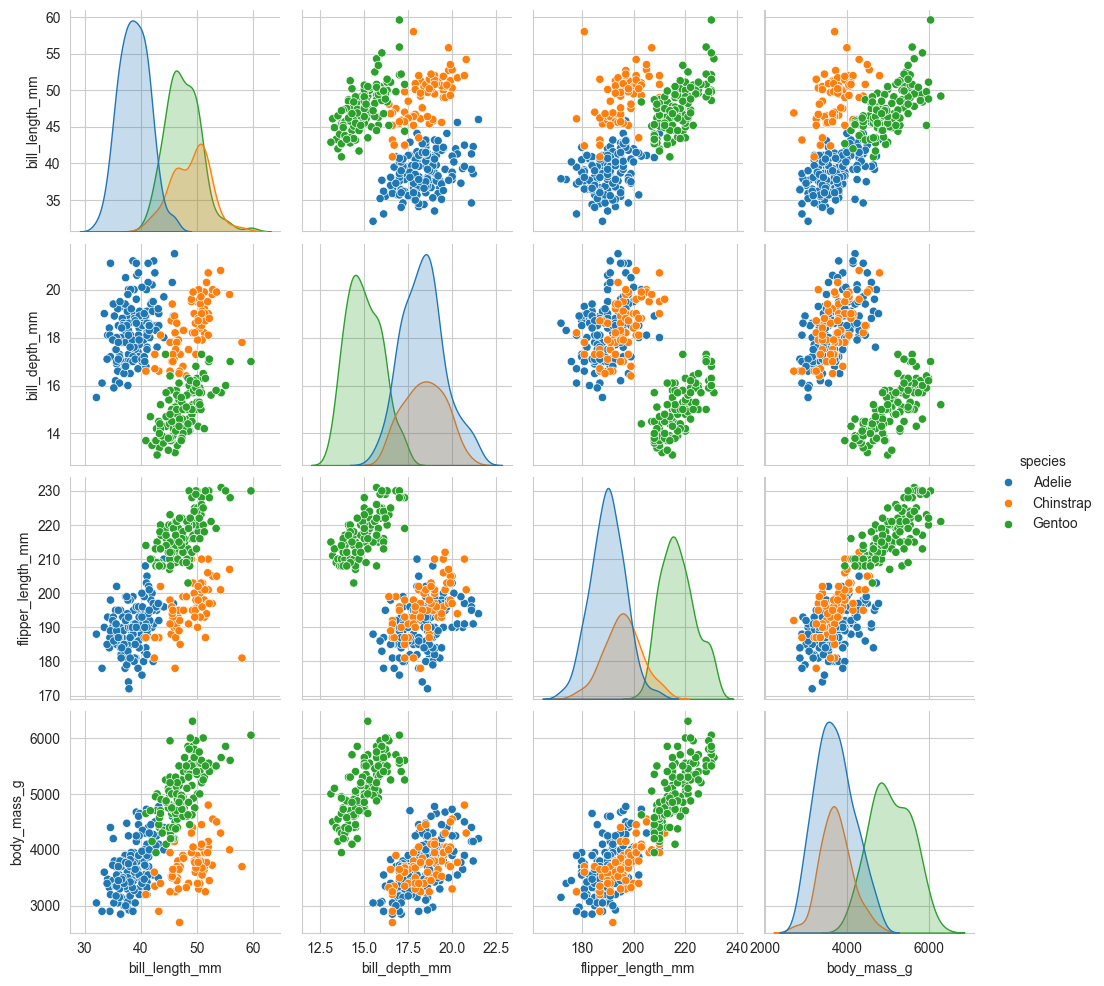

In [11]:
sns.pairplot(penguins, hue='species')

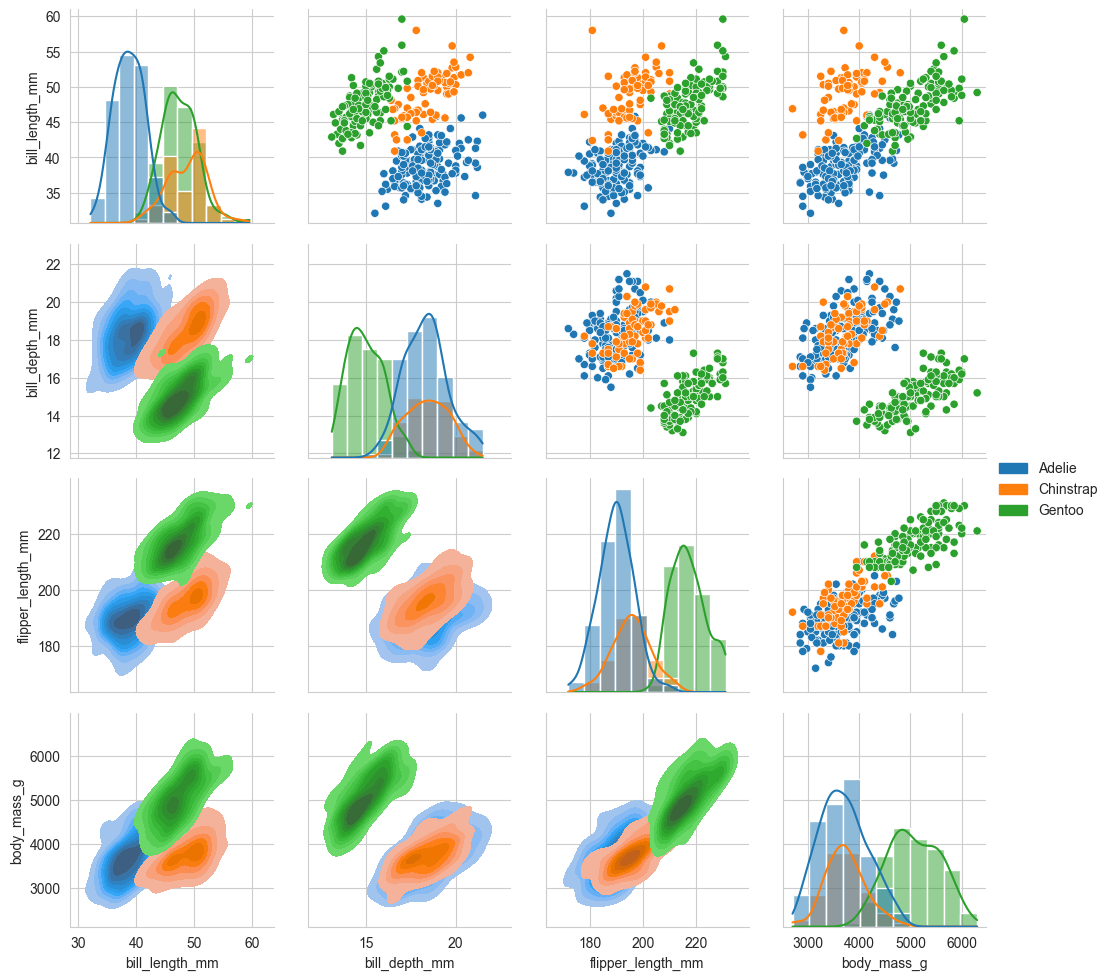

In [12]:
g = sns.PairGrid(penguins, hue='species')
# g.map_upper(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
g.add_legend(title="", adjust_subtitles=True)